# Florida AgriPV Study with raytrace

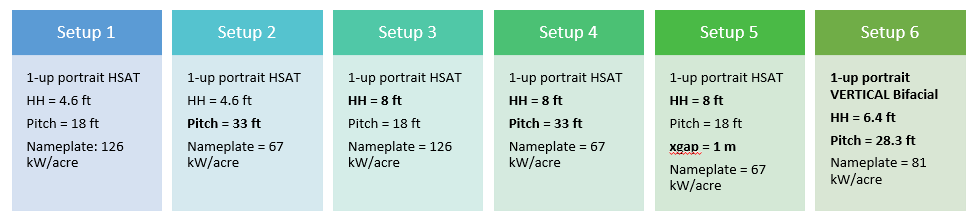

In [1]:
#import os
#from pathlib import Path
import numpy as np
import datetime
#import pickle
import pandas as pd
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


# Making folders for saving the simulations
#basefolder = os.path.join(os.getcwd(), 'TEMP')

In [2]:
font = {#'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}
matplotlib.rc('font', **font)

#sns.set(rc={'figure.figsize':(5.7,4.27)})

In [3]:
ft2m = 0.3048  # Conversion factor
resolutionGround = 0.1  # use 1 for faster test runs
xp = 10
lat = 30.480671646128137
lon = -83.92997540675283
sazm = 90 #
albedo = 0.2 # 'grass'
nMods = 20
nRows = 7

In [4]:
startdates = [pd.to_datetime('2021-01-01 6:0:0'),
              pd.to_datetime('2021-02-01 6:0:0'),
              pd.to_datetime('2021-03-01 6:0:0'),
              pd.to_datetime('2021-04-01 6:0:0'),
                pd.to_datetime('2021-05-01 6:0:0'), 
                pd.to_datetime('2021-06-01 6:0:0'),
                pd.to_datetime('2021-07-01 6:0:0'),
                pd.to_datetime('2021-08-01 6:0:0'),
                pd.to_datetime('2021-09-01 6:0:0'),
                pd.to_datetime('2021-10-01 6:0:0'),
                pd.to_datetime('2021-11-01 6:0:0'),
                pd.to_datetime('2021-12-01 6:0:0'),
                pd.to_datetime('2021-05-01 6:0:0'),
                pd.to_datetime('2021-01-01 6:0:0')]
enddates = [pd.to_datetime('2021-01-31 20:0:0'),
            pd.to_datetime('2021-02-28 20:0:0'),
            pd.to_datetime('2021-03-31 20:0:0'),
            pd.to_datetime('2021-04-30 20:0:0'),
            pd.to_datetime('2021-05-31 20:0:0'),    # May
            pd.to_datetime('2021-06-30 20:0:0'),   # June
            pd.to_datetime('2021-07-31 20:0:0'),   
            pd.to_datetime('2021-08-31 20:0:0'),
            pd.to_datetime('2021-09-30 20:0:0'), 
            pd.to_datetime('2021-10-31 20:0:0'), 
            pd.to_datetime('2021-11-30 20:0:0'), 
            pd.to_datetime('2021-12-31 20:0:0'), 
            pd.to_datetime('2021-09-30 20:0:0'),
            pd.to_datetime('2021-12-31 20:0:0')]
            

## 2. Plot Bifacial Gain Results

In [5]:
df = []
for setup in range(1, 7):
    for ii in range(0, len(startdates)):
        monthstart = startdates[ii].month
        monthend = enddates[ii].month

        resultsfile = r'C:\Users\sayala\Documents\GitHub\Studies\AgriPV-Florida-Study\TEMP\Setup_{}_from_{}TO{}\results.pkl'.format(setup, monthstart, monthend)
        df.append(pd.read_pickle(resultsfile))

In [6]:
df = pd.DataFrame(df, columns=(
        'Setup', 'latitude', 'longitude', 
        'MonthStart', 'MonthEnd',
        'ghi_sum',
        'ResultPVWm2Front', 'ResultPVWm2Back', 'ResultPVGround',
        'edgemean', 'insidemean',
        'testbedAmean', 'testbedBmean',
        'testbedCmean', 'testbedDmean',
        'testbedEmean',  'testbedFmean',
        'edge_normGHI', 'inside_normGHI',
        'testbedA_normGHI', 'testbedB_normGHI', 'testbedC_normGHI',
        'testbedD_normGHI', 'testbedE_normGHI', 'testbedF_normGHI',
        ))

In [7]:
import calendar

In [8]:
monthslist = []

for rr in range(0, len(df)):
    
    if (df['MonthStart'].iloc[rr] == 1) and (df['MonthEnd'].iloc[rr] == 12):
       # print("Season")
        monthslist.append("Season")
    elif df['MonthStart'].iloc[rr] == 5 and df['MonthEnd'].iloc[rr] == 9:
       # print("Summer")
        monthslist.append("Summer")
    else:
        monthslist.append(calendar.month_abbr[df['MonthStart'].iloc[rr]])
    

In [9]:
df['Month'] = monthslist

In [10]:
df.to_csv('Florida_All.csv')

In [11]:
pitch1 = 18*ft2m
pitch2 = 33*ft2m
pitch3 = 18*ft2m
pitch4 = 33*ft2m
pitch5 = 18*ft2m
pitch6 = 28.3*ft2m

xps = [np.arange(0, pitch1, 0.1),
       np.arange(0, pitch2, 0.1),
       np.arange(0, pitch3, 0.1),
       np.arange(0, pitch4, 0.1),
       np.arange(0, pitch5, 0.1),
       np.arange(0, pitch6, 0.1)]


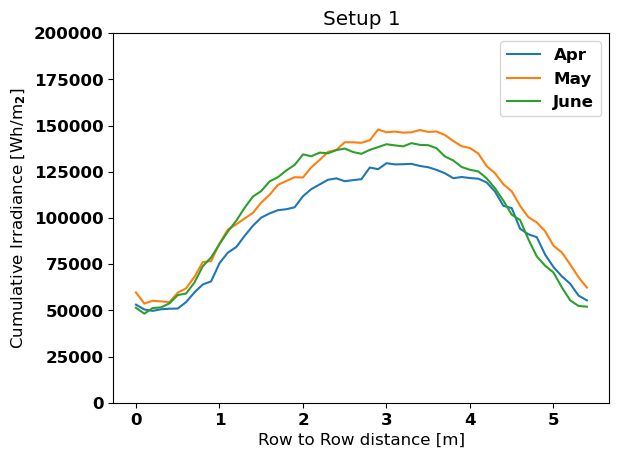

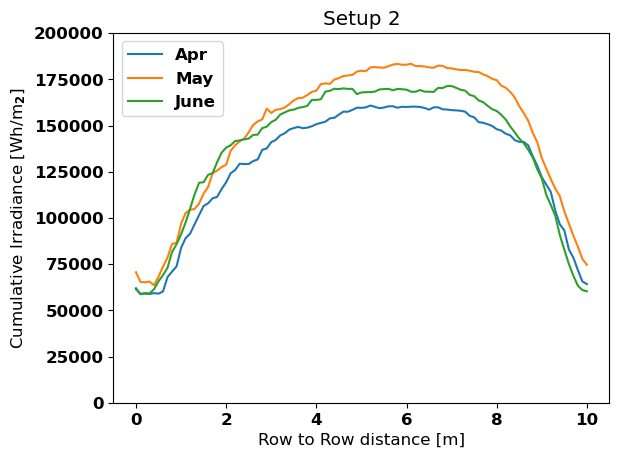

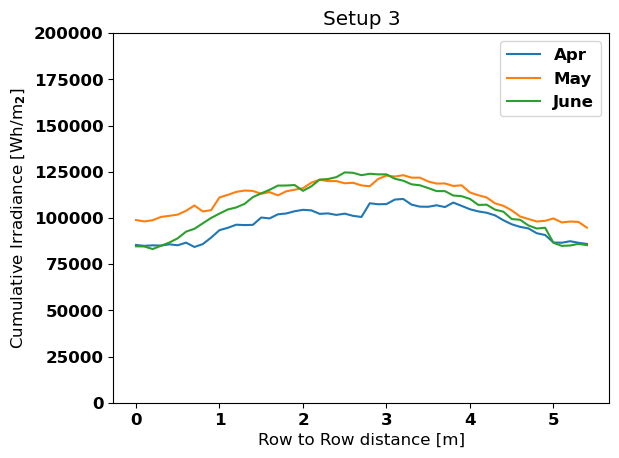

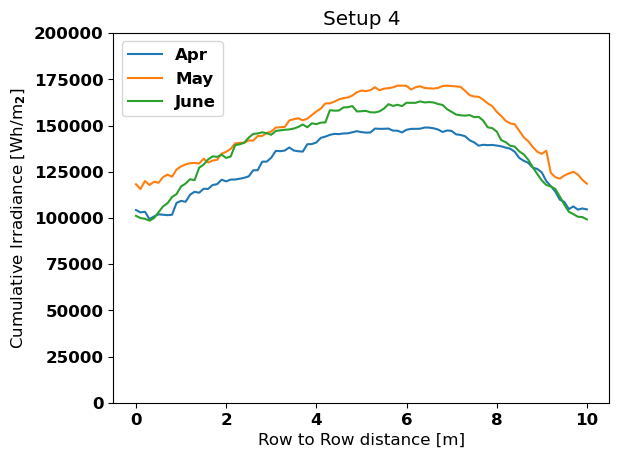

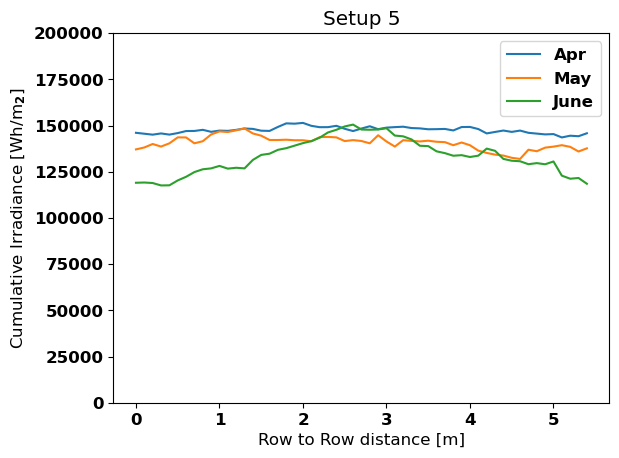

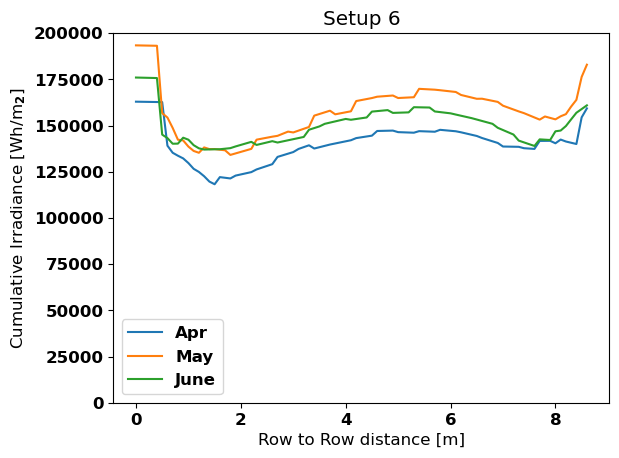

In [12]:
for ii in range (1, 7):
    foo = df[(df['Setup']==ii) & (df['Month']=='Apr')]
    foo1 = df[(df['Setup']==ii) & (df['Month']=='May')]
    foo2 = df[(df['Setup']==ii) & (df['Month']=='Jun')]

    plt.figure()
    plt.plot(xps[ii-1], foo['ResultPVGround'].iloc[0], label='Apr')
    plt.plot(xps[ii-1], foo1['ResultPVGround'].iloc[0], label='May')
    plt.plot(xps[ii-1], foo2['ResultPVGround'].iloc[0], label='June')
    plt.title('Setup '+str(ii))
    plt.xlabel('Row to Row distance [m]')
    plt.ylabel('Cumulative Irradiance [Wh/m$_2$]')
    plt.ylim([0,200000])
    plt.legend()

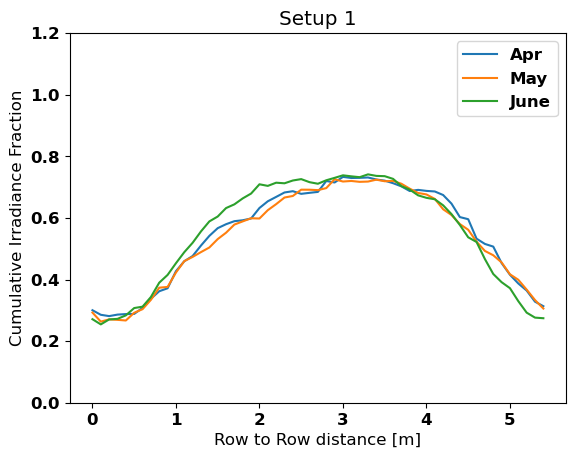

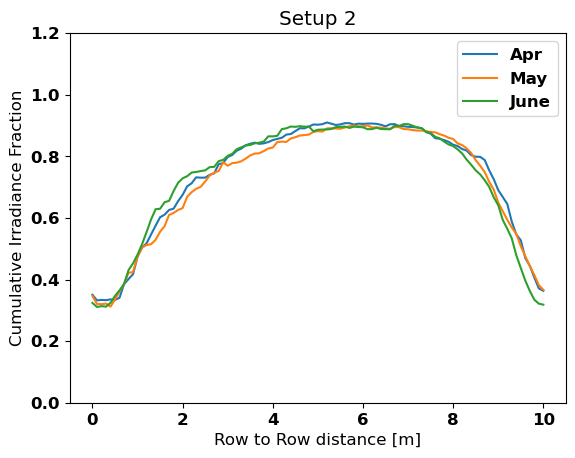

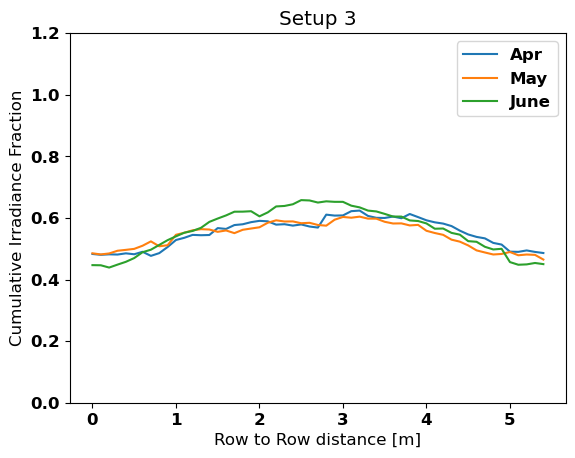

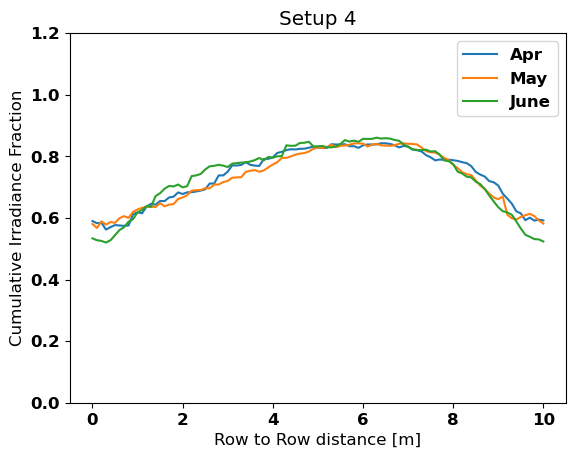

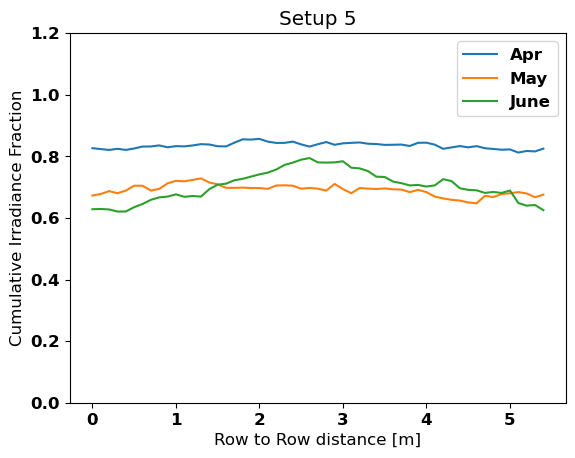

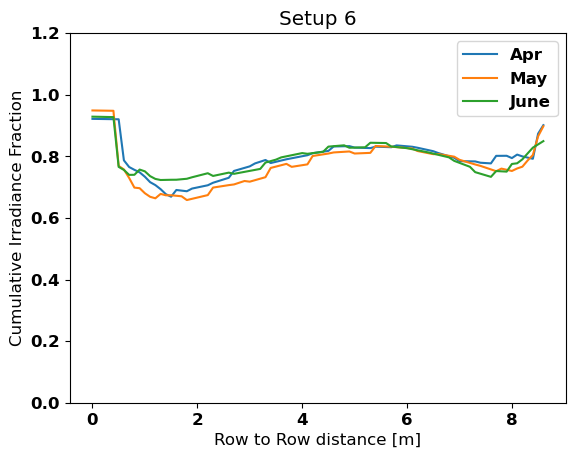

In [13]:
for ii in range (1, 7):
    foo = df[(df['Setup']==ii) & (df['Month']=='Apr')]
    foo1 = df[(df['Setup']==ii) & (df['Month']=='May')]
    foo2 = df[(df['Setup']==ii) & (df['Month']=='Jun')]

    plt.figure()
    plt.plot(xps[ii-1], foo['ResultPVGround'].iloc[0]/foo['ghi_sum'].iloc[0], label='Apr')
    plt.plot(xps[ii-1], foo1['ResultPVGround'].iloc[0]/foo1['ghi_sum'].iloc[0], label='May')
    plt.plot(xps[ii-1], foo2['ResultPVGround'].iloc[0]/foo2['ghi_sum'].iloc[0], label='June')
    plt.title('Setup '+str(ii))
    plt.xlabel('Row to Row distance [m]')
    plt.ylabel('Cumulative Irradiance Fraction')
    plt.ylim([0,1.2])
    plt.legend()

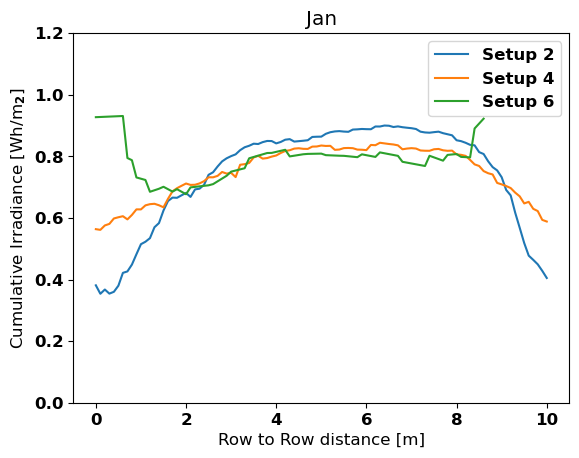

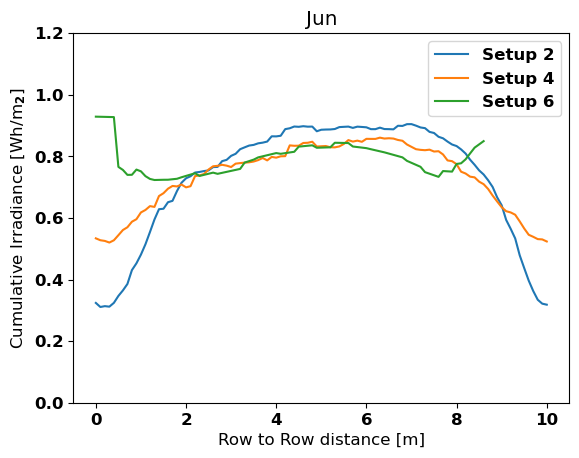

In [14]:
mmms = ['Jan', 'Jun']

for mmm in mmms:
    foo = df[(df['Setup']==2) & (df['Month']==mmm)]
    foo1 = df[(df['Setup']==4) & (df['Month']==mmm)]
    foo2 = df[(df['Setup']==6) & (df['Month']==mmm)]

    plt.figure()
    plt.plot(xps[1], foo['ResultPVGround'].iloc[0]/foo['ghi_sum'].iloc[0], label='Setup 2')
    plt.plot(xps[3], foo1['ResultPVGround'].iloc[0]/foo1['ghi_sum'].iloc[0], label='Setup 4')
    plt.plot(xps[5], foo2['ResultPVGround'].iloc[0]/foo2['ghi_sum'].iloc[0], label='Setup 6')
    plt.title(mmm)
    plt.xlabel('Row to Row distance [m]')
    plt.ylabel('Cumulative Irradiance [Wh/m$_2$]')
    plt.ylim([0,1.2])
    plt.legend()

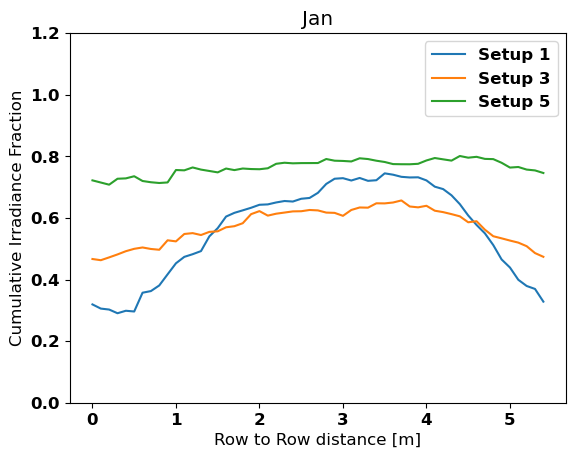

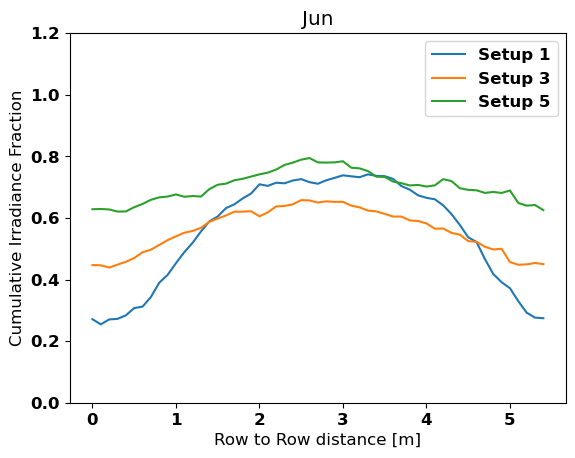

In [15]:
mmms = ['Jan', 'Jun']
for mmm in mmms:
    foo = df[(df['Setup']==1) & (df['Month']==mmm)]
    foo1 = df[(df['Setup']==3) & (df['Month']==mmm)]
    foo2 = df[(df['Setup']==5) & (df['Month']==mmm)]

    plt.figure()
    plt.plot(xps[0], foo['ResultPVGround'].iloc[0]/foo['ghi_sum'].iloc[0], label='Setup 1')
    plt.plot(xps[2], foo1['ResultPVGround'].iloc[0]/foo1['ghi_sum'].iloc[0], label='Setup 3')
    plt.plot(xps[4], foo2['ResultPVGround'].iloc[0]/foo2['ghi_sum'].iloc[0], label='Setup 5')
    plt.title(mmm)
    plt.xlabel('Row to Row distance [m]')
    plt.ylabel('Cumulative Irradiance Fraction')
    plt.ylim([0,1.2])
    plt.legend()

C:\Users\sayala\AppData\Local\Temp\1\ipykernel_25004\3138653305.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (10,4))


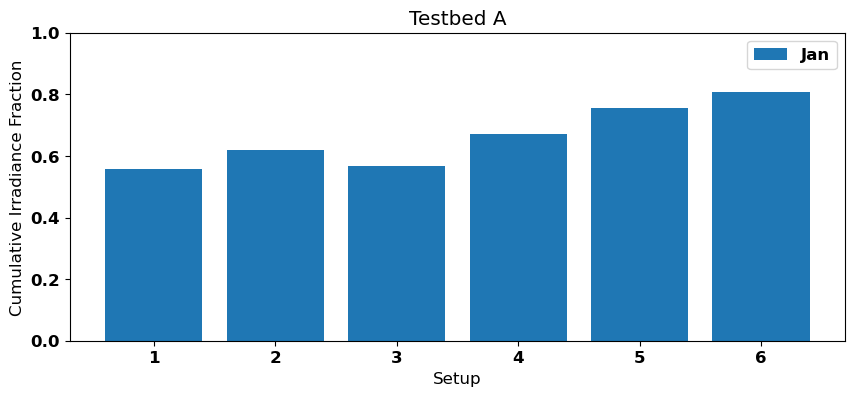

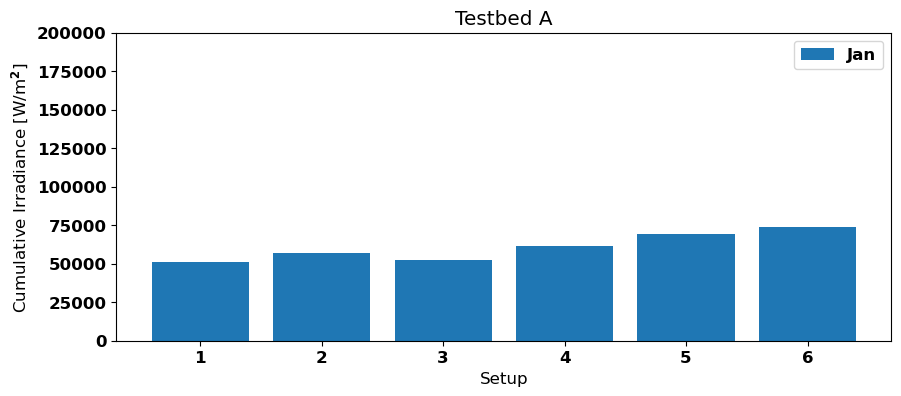

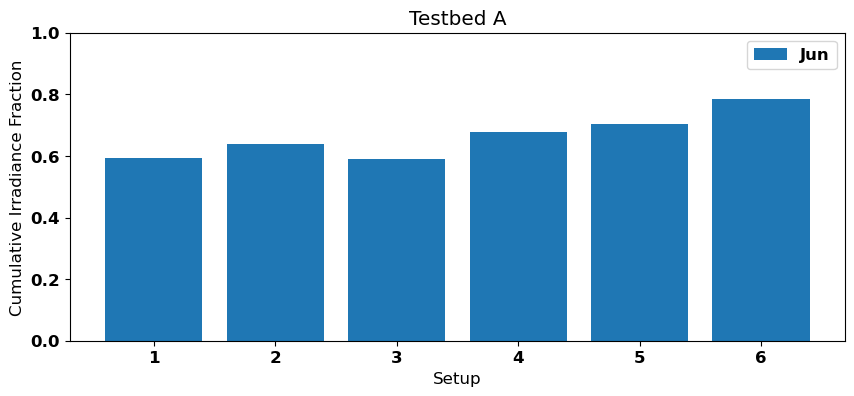

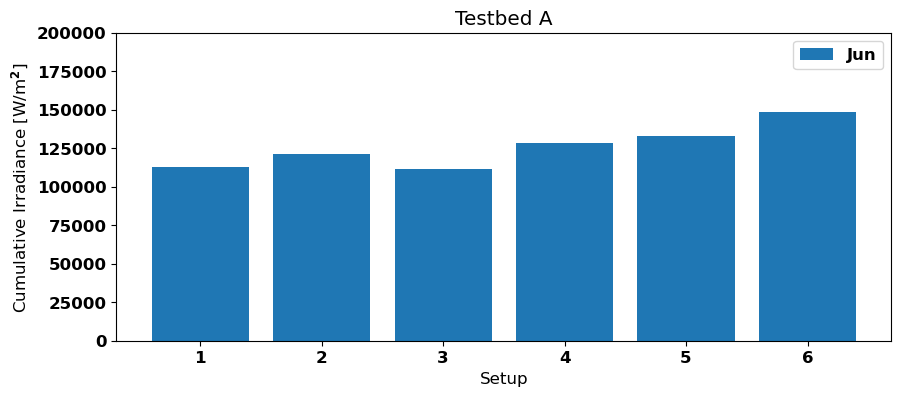

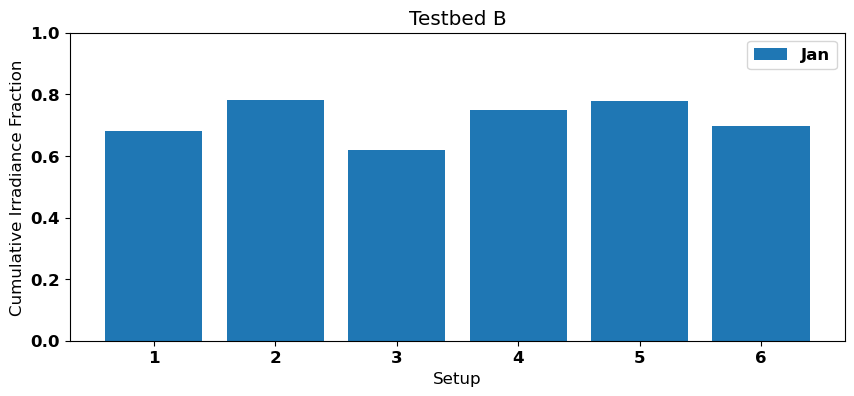

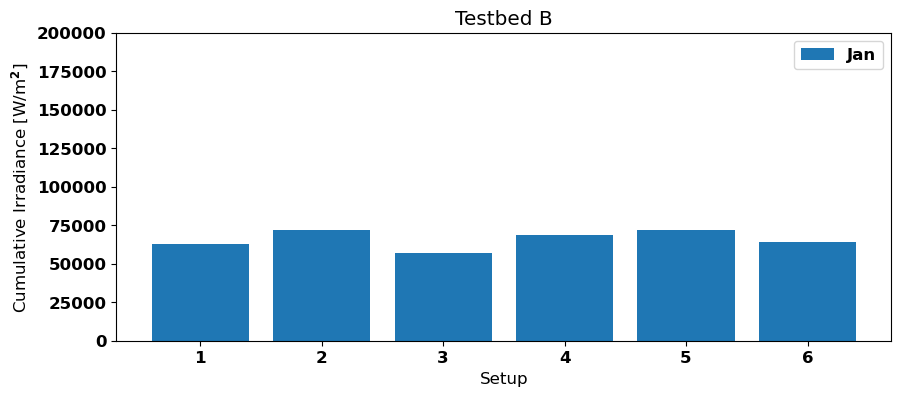

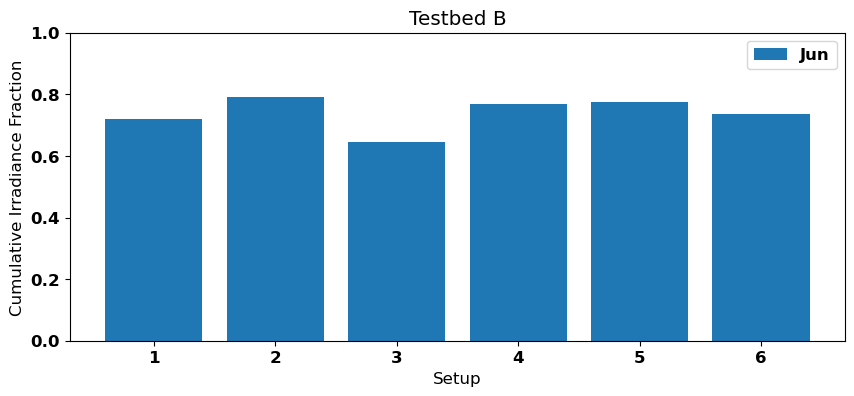

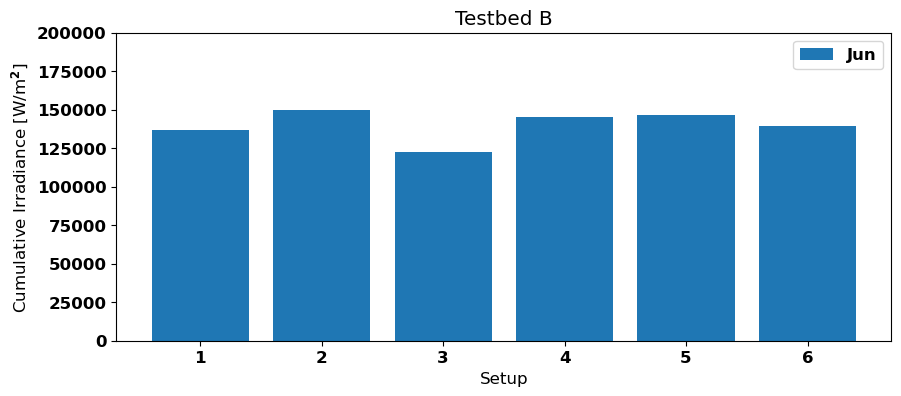

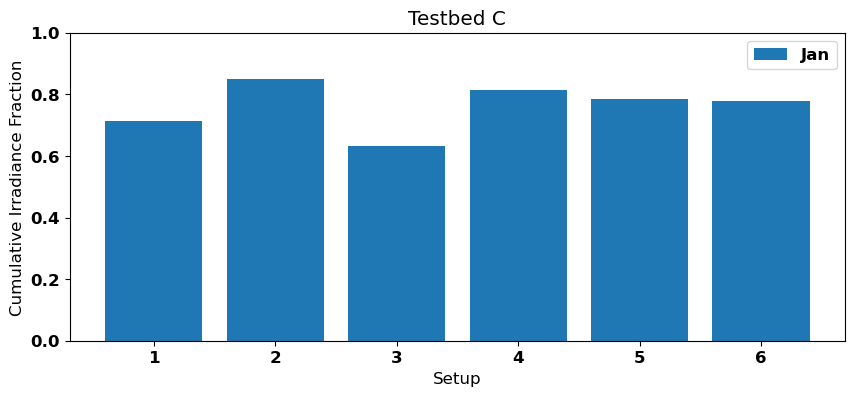

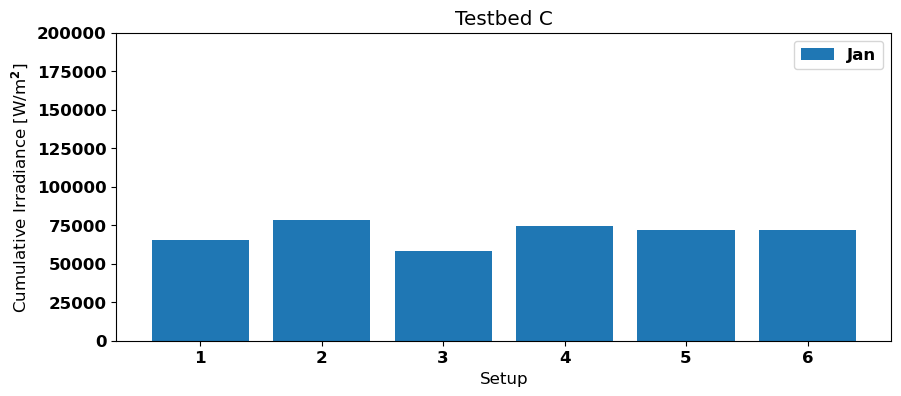

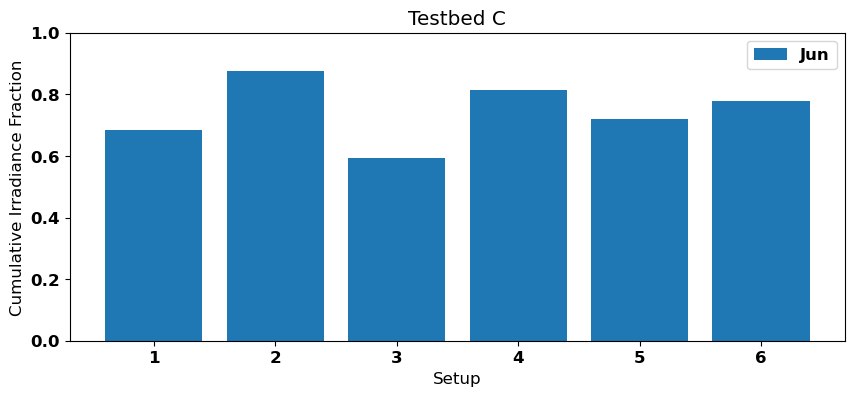

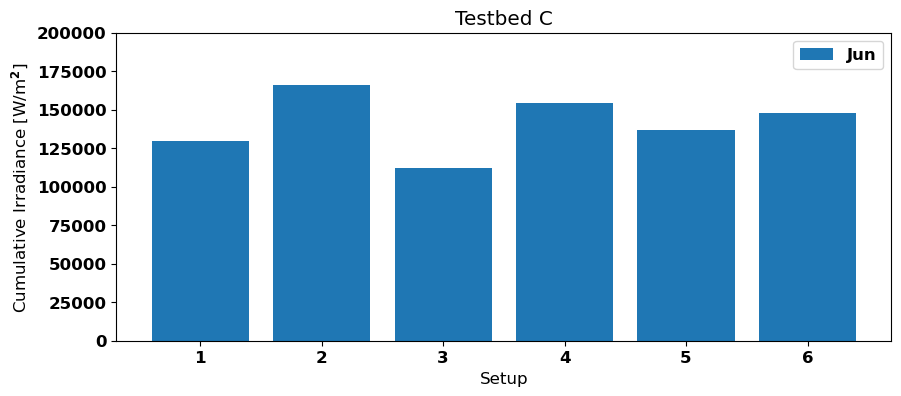

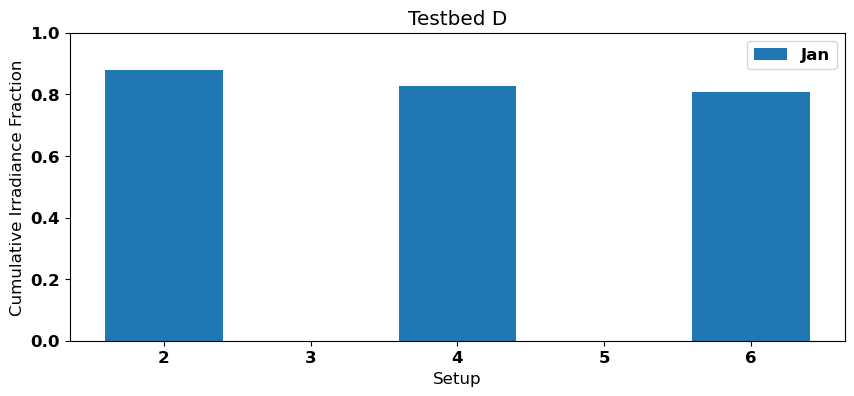

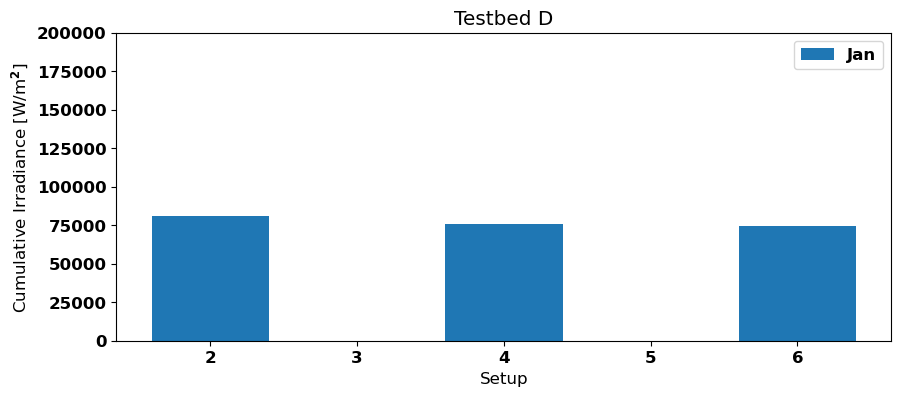

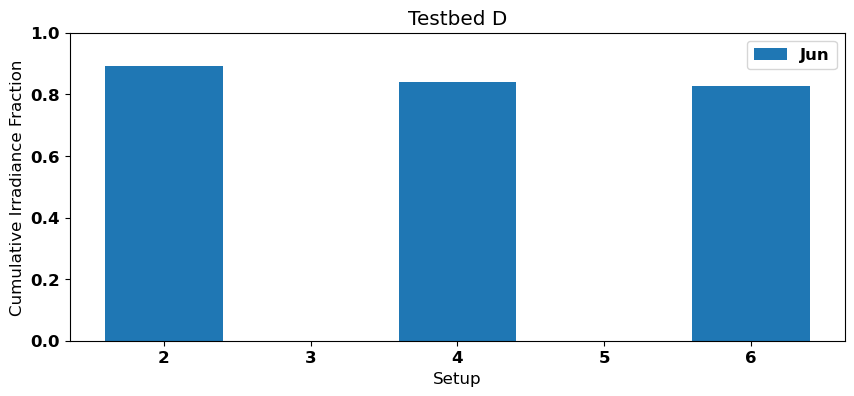

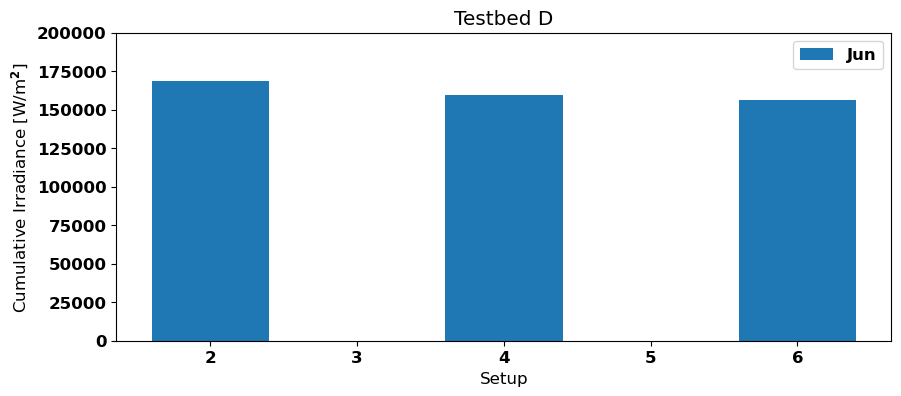

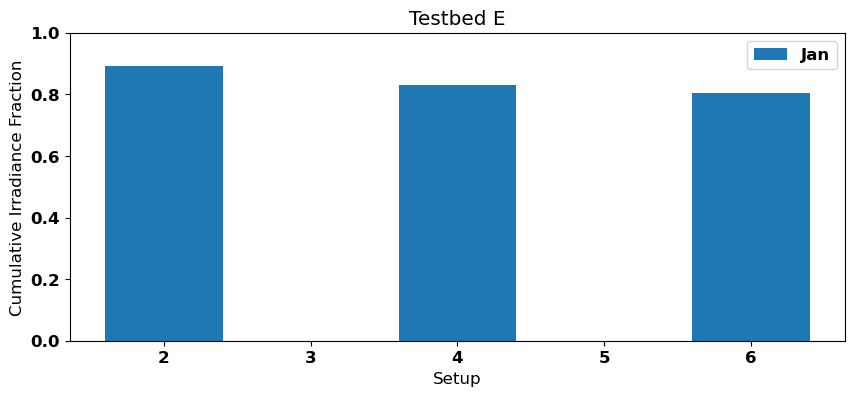

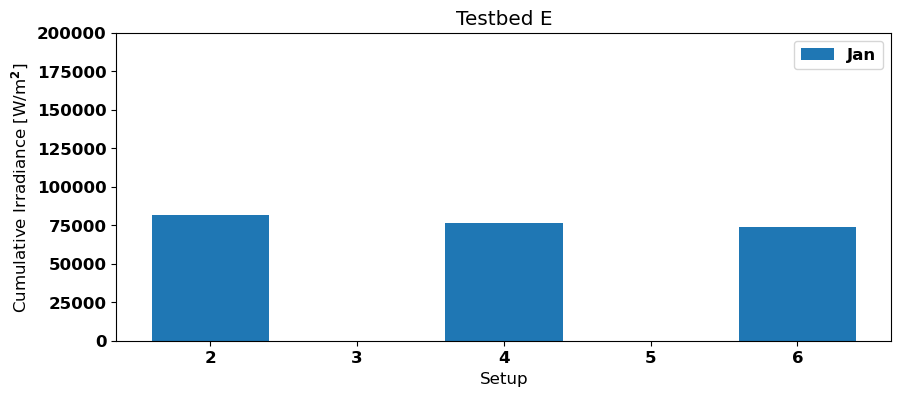

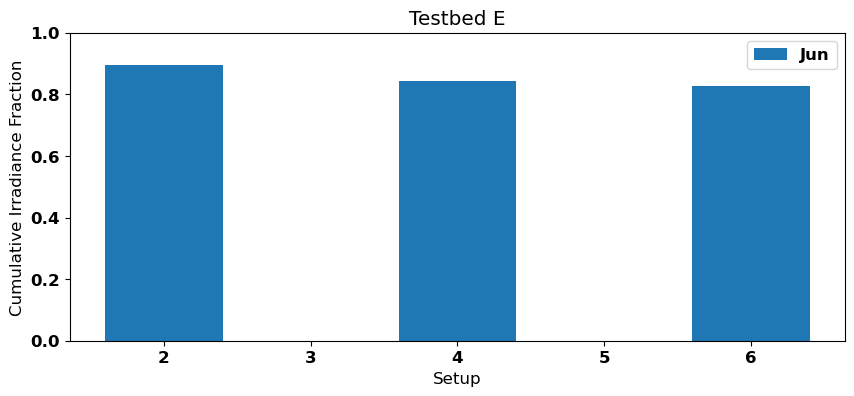

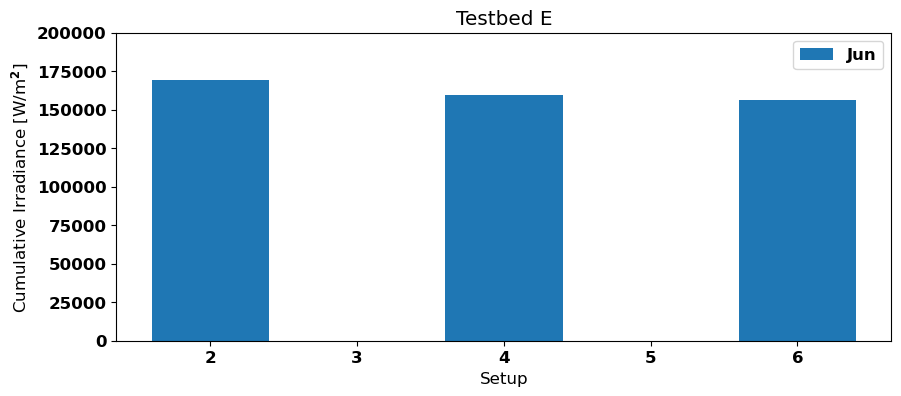

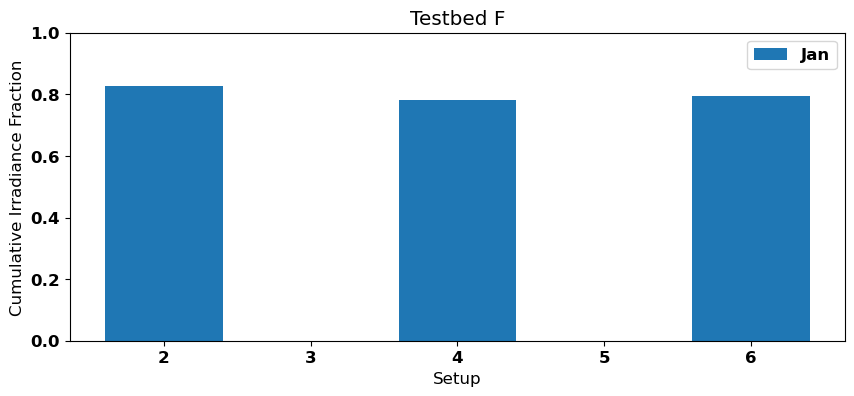

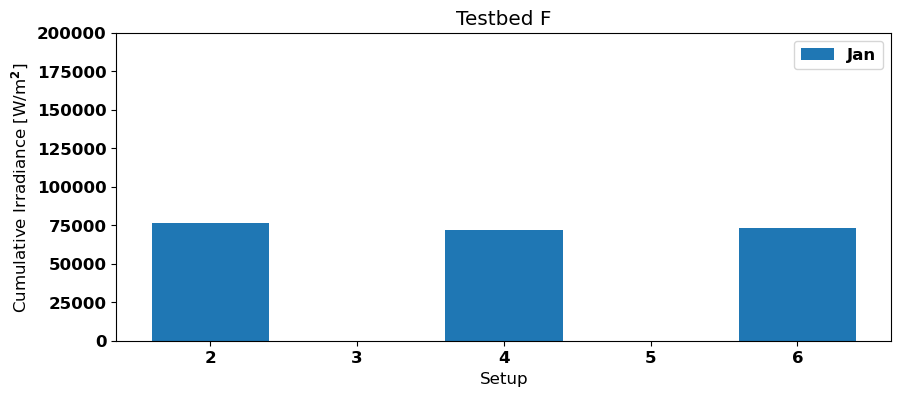

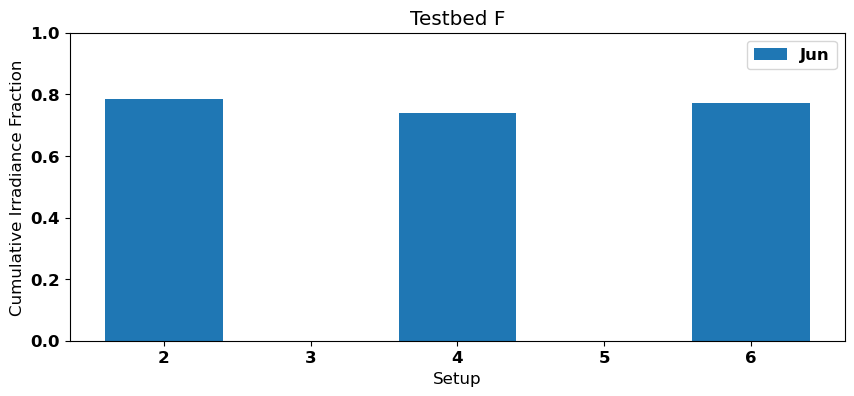

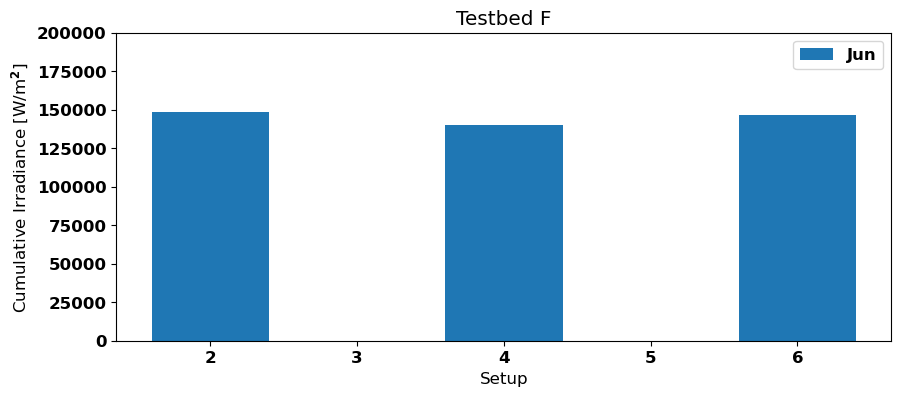

In [16]:
testbeds = ['A', 'B', 'C', 'D', 'E', 'F']    
mmms = ['Jan', 'Jun']

for testbed in testbeds:
    for mmm in mmms:
        #testbed = 'F'
        #mmm = 'Jun'
        tbn = 'testbed'+testbed+'_normGHI'
        tbm = 'testbed'+testbed+'mean'

        fig, ax = plt.subplots(figsize = (10,4))
        ax.bar(df[df['Month']==mmm]['Setup'],df[df['Month']==mmm][tbn])
        #ax.set_xticks(idx)
        #ax.set_xticklabels(rotation=65)
        ax.legend([mmm])
        ax.set_xlabel('Setup')
        #ax.set_ylim([0,200000])
        ax.set_ylim([0,1])
        ax.set_title('Testbed '+testbed)
        ax.set_ylabel('Cumulative Irradiance Fraction')

        fig, ax = plt.subplots(figsize = (10,4))
        ax.bar(df[df['Month']==mmm]['Setup'],df[df['Month']==mmm][tbm])
        #ax.set_xticks(idx)
        #ax.set_xticklabels(rotation=65)
        ax.legend([mmm])
        ax.set_xlabel('Setup')
        ax.set_ylim([0,200000])
        ax.set_title('Testbed '+testbed)
        ax.set_ylabel('Cumulative Irradiance [W/m$^2$]')



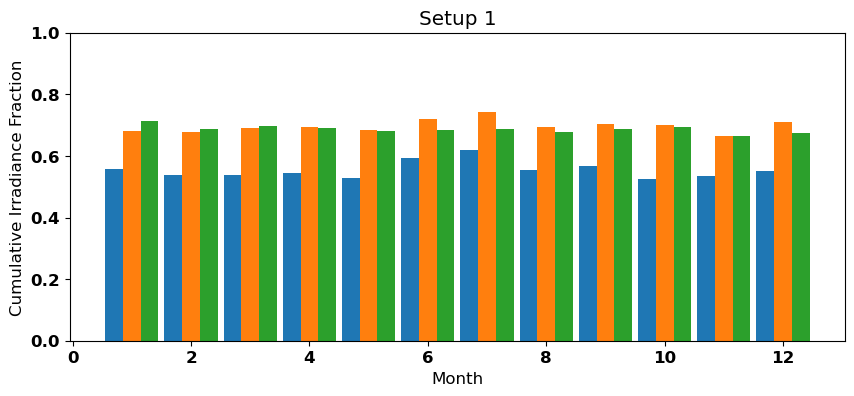

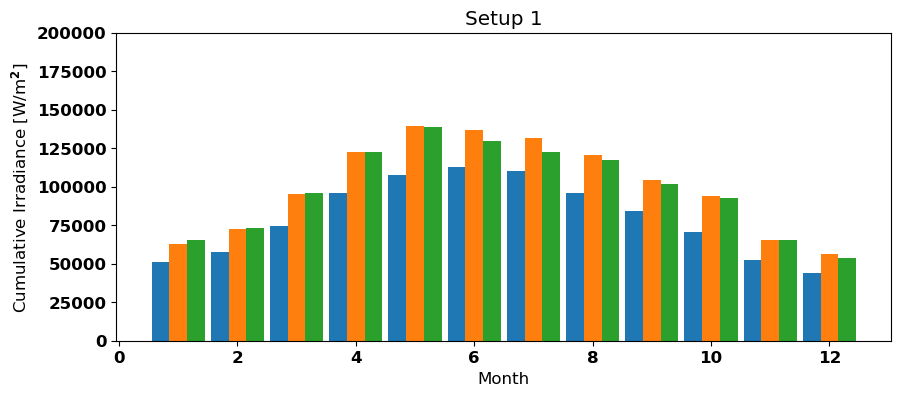

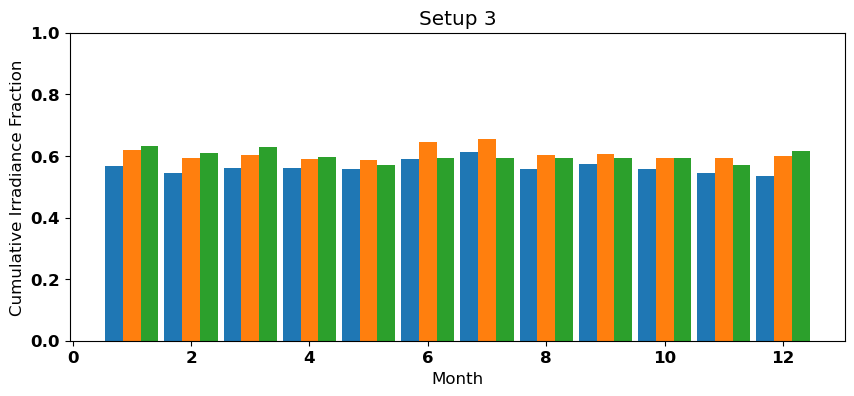

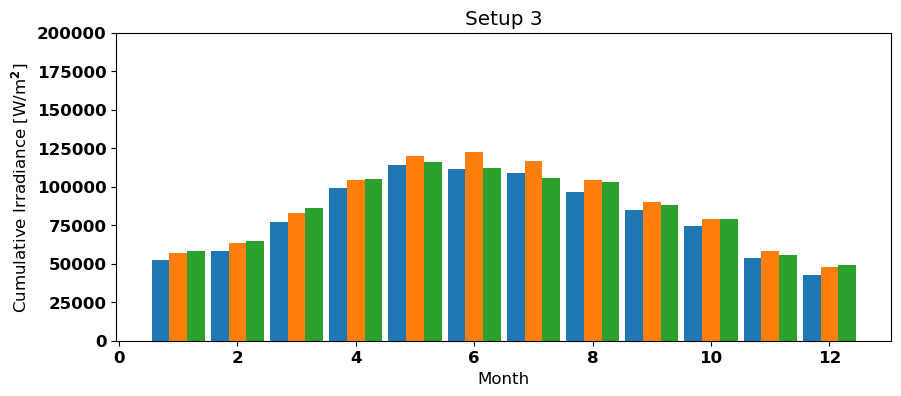

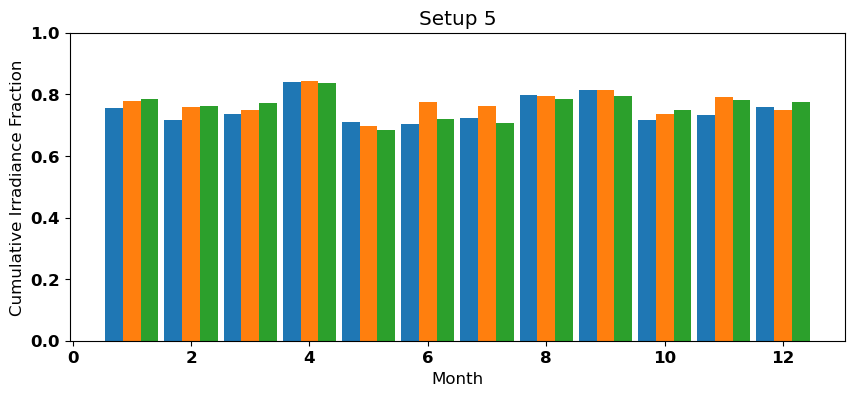

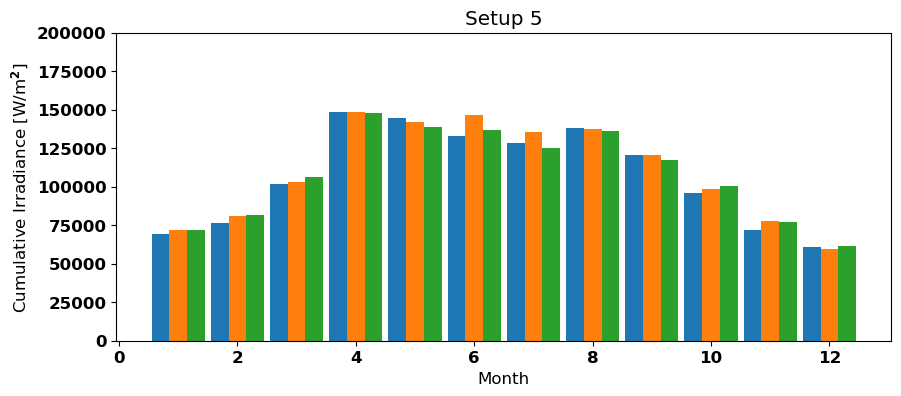

In [17]:
setups = [1, 3, 5]
for Setup in setups:

    X_axis = np.arange(1, len(df[df['Setup']==Setup]['Month'])-1)
    fig, ax = plt.subplots(figsize = (10,4))

    ax.bar(X_axis-0.3,df[df['Setup']==Setup]['testbedA_normGHI'][:-2], 0.3, label='Testbed A')
    ax.bar(X_axis+0,df[df['Setup']==Setup]['testbedB_normGHI'][:-2], 0.3, label='Testbed B')
    ax.bar(X_axis+0.3,df[df['Setup']==Setup]['testbedC_normGHI'][:-2], 0.3, label='Testbed C')
    #ax.set_ylim([0, 200000])
    ax.set_ylim([0, 1])
    #fig.legend()
    ax.set_xlabel('Month')
    ax.set_ylabel('Cumulative Irradiance Fraction')
    ax.set_title('Setup '+str(Setup))

    fig, ax = plt.subplots(figsize = (10,4))

    ax.bar(X_axis-0.3,df[df['Setup']==Setup]['testbedAmean'][:-2], 0.3,  label='Testbed A')
    ax.bar(X_axis+0,df[df['Setup']==Setup]['testbedBmean'][:-2], 0.3,  label='Testbed B')
    ax.bar(X_axis+0.3,df[df['Setup']==Setup]['testbedCmean'][:-2], 0.3,  label='Testbed C')
    ax.set_ylim([0, 200000])
    #ax.set_ylim([0, 1])
    ax.set_xlabel('Month')
    ax.set_ylabel('Cumulative Irradiance [W/m$^2$]')
    ax.set_title('Setup '+str(Setup))



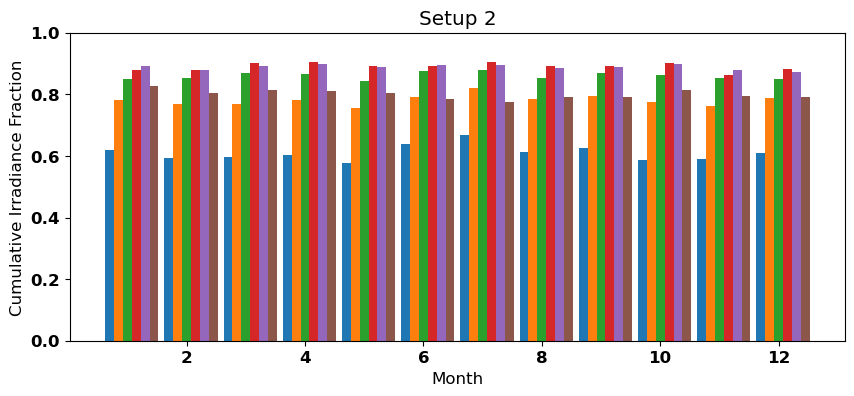

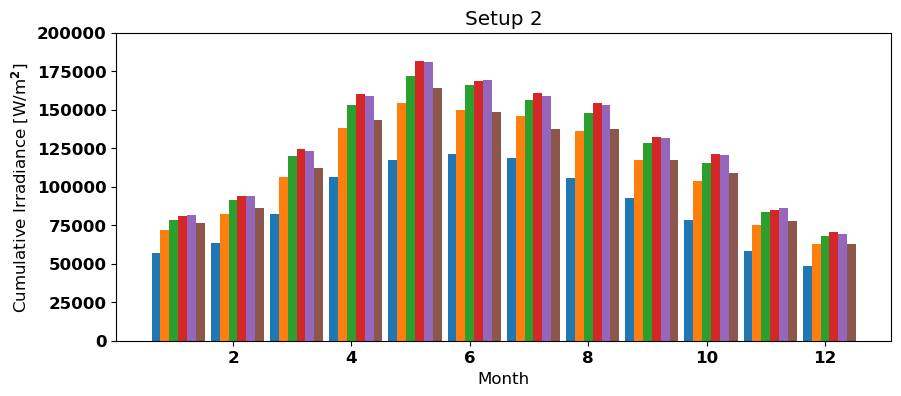

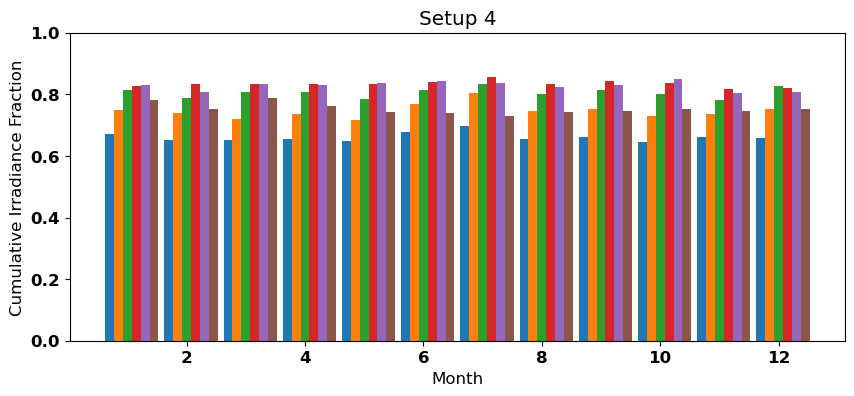

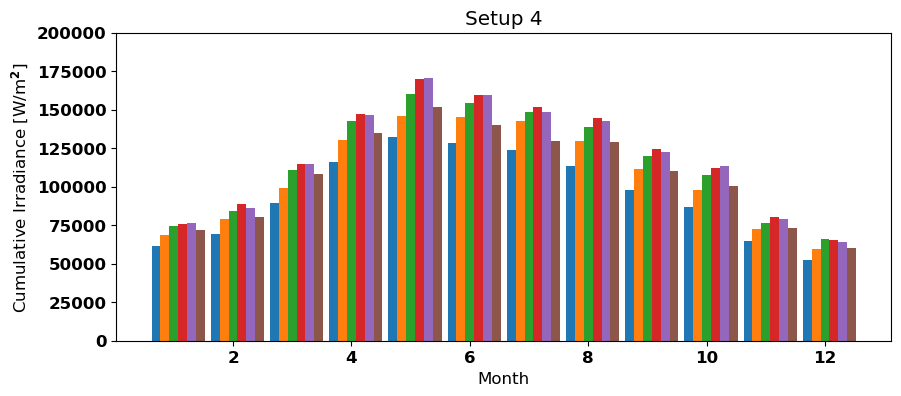

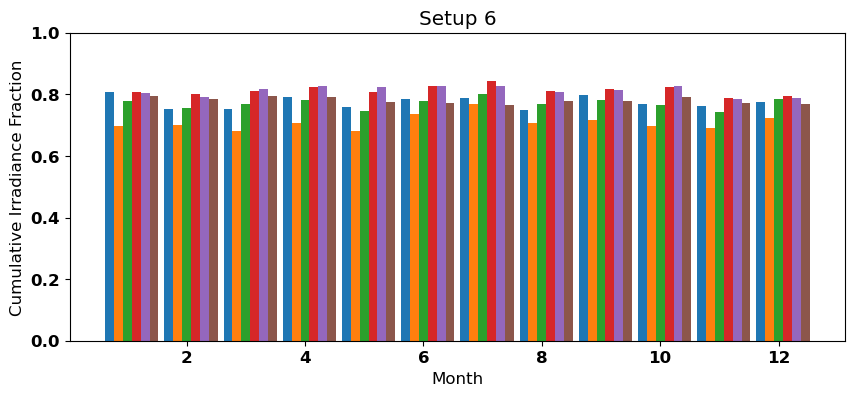

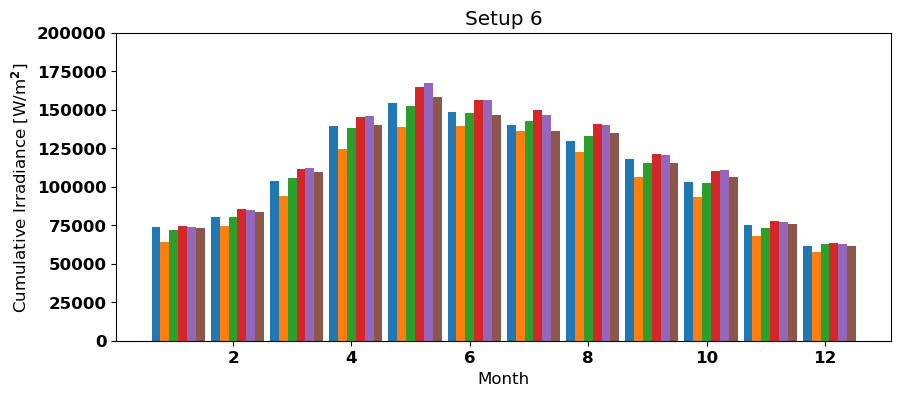

In [18]:
setups = [2, 4, 6]
for Setup in setups:

    X_axis = np.arange(1, len(df[df['Setup']==Setup]['Month'])-1)
    fig, ax = plt.subplots(figsize = (10,4))

    ax.bar(X_axis-0.3,df[df['Setup']==Setup]['testbedA_normGHI'][:-2], 0.15, label='Testbed A')
    ax.bar(X_axis-0.15,df[df['Setup']==Setup]['testbedB_normGHI'][:-2], 0.15, label='Testbed B')
    ax.bar(X_axis-0.0,df[df['Setup']==Setup]['testbedC_normGHI'][:-2], 0.15, label='Testbed C')
    ax.bar(X_axis+0.15,df[df['Setup']==Setup]['testbedD_normGHI'][:-2], 0.15, label='Testbed D')
    ax.bar(X_axis+0.30,df[df['Setup']==Setup]['testbedE_normGHI'][:-2], 0.15, label='Testbed E')
    ax.bar(X_axis+0.45,df[df['Setup']==Setup]['testbedF_normGHI'][:-2], 0.15, label='Testbed F')

    #ax.set_ylim([0, 200000])
    ax.set_ylim([0, 1])
    #fig.legend()
    ax.set_xlabel('Month')
    ax.set_ylabel('Cumulative Irradiance Fraction')
    ax.set_title('Setup '+str(Setup))

    fig, ax = plt.subplots(figsize = (10,4))

    ax.bar(X_axis-0.3,df[df['Setup']==Setup]['testbedAmean'][:-2], 0.15,  label='Testbed A')
    ax.bar(X_axis-0.15,df[df['Setup']==Setup]['testbedBmean'][:-2], 0.15,  label='Testbed B')
    ax.bar(X_axis+0,df[df['Setup']==Setup]['testbedCmean'][:-2], 0.15,  label='Testbed C')
    ax.bar(X_axis+0.15,df[df['Setup']==Setup]['testbedDmean'][:-2], 0.15, label='Testbed D')
    ax.bar(X_axis+0.30,df[df['Setup']==Setup]['testbedEmean'][:-2], 0.15, label='Testbed E')
    ax.bar(X_axis+0.45,df[df['Setup']==Setup]['testbedFmean'][:-2], 0.15, label='Testbed F')
    ax.set_ylim([0, 200000])
    #ax.set_ylim([0, 1])
    ax.set_xlabel('Month')
    ax.set_ylabel('Cumulative Irradiance [W/m$^2$]')
    ax.set_title('Setup '+str(Setup))

